In [1]:
import pylab as plt
import numpy as np
import pandas as pd
import proposal as pp  #installed with pip
import scipy
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import re
import sys
import glob
from MCEq.core import config, MCEqRun
import crflux.models as crf
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle

In [2]:
def get_color(n, colormax, cmap="PiYG"):
    
    this_cmap = plt.get_cmap(cmap)
    return this_cmap(n/colormax)

CLRS=["gray","firebrick","orchid","deepskyblue","orange","blueviolet","magenta","limegreen","pink","tomato","red","black","yellow","darkgreen"]

energies=[100,250,500,750,1000,1500,2000,3000,4000,5000,6000,7500,8500,10000,11000,12500,15000,20000,25000]
GeV=1000

NumToRun=1000

AreaOfNextNEW=np.pi*(45/2)**2*66 #cm^2 but these dimensions need double checked

In [6]:
#importing Proposal Outputs
r=0

for files in glob.glob('/Users/rogerslc/PROPOSAL/PROPOSAL/CorrectPercs/ProposalMuons*.h5'):
    #print (files)
    run=re.search('Muons(.*)_', files)
    X=str(run.group(1))
    run=re.search('_(.*).h5', files)
    Y=str(run.group(1))
    if r==0:
        musDatamtn=pd.read_hdf(files)
        musDatamtn['X']=    X
        musDatamtn['Y']=    Y        
        r+=1
    else:
        df=pd.read_hdf(files)
        df['X']=    X
        df['Y']=    Y  
        musDatamtn=musDatamtn.append(df, ignore_index=True)

        
musDatamtn['X'] = musDatamtn['X'].astype(float)        
musDatamtn['Y'] = musDatamtn['Y'].astype(float)          


musDatamtn['Theta']=np.rad2deg(musDatamtn['Theta'])
musDatamtn['Theta']=np.where(musDatamtn['Theta'] <0,musDatamtn['Theta']+180,musDatamtn['Theta'])

musDatamtn=musDatamtn[(musDatamtn.X!=-505)&(musDatamtn.X!=-405)&(musDatamtn.X!=295)]

kX=musDatamtn.X.unique()
kX.sort()
lY=musDatamtn.Y.unique()
lY.sort()
energies=musDatamtn.Energy.unique()
energies.sort()

print(kX,lY,energies)

[-305. -205. -105.   -5.   95.  195.  395.  495.  595.  695.  795.  895.
  995. 1095. 1195. 1295. 1395. 1495.] [-2255. -2155. -2055. -1955. -1855. -1755. -1655. -1555. -1455. -1355.
 -1255. -1155. -1055.  -955.  -855.  -755.  -655.  -555.  -455.  -355.
  -255.  -155.   -55.    45.   145.   245.   345.   445.   545.   645.
   745.] [  100000   250000   500000   750000  1000000  1500000  2000000  3000000
  4000000  5000000  6000000  7500000  8500000 10000000 11000000 12500000
 15000000 20000000 25000000]


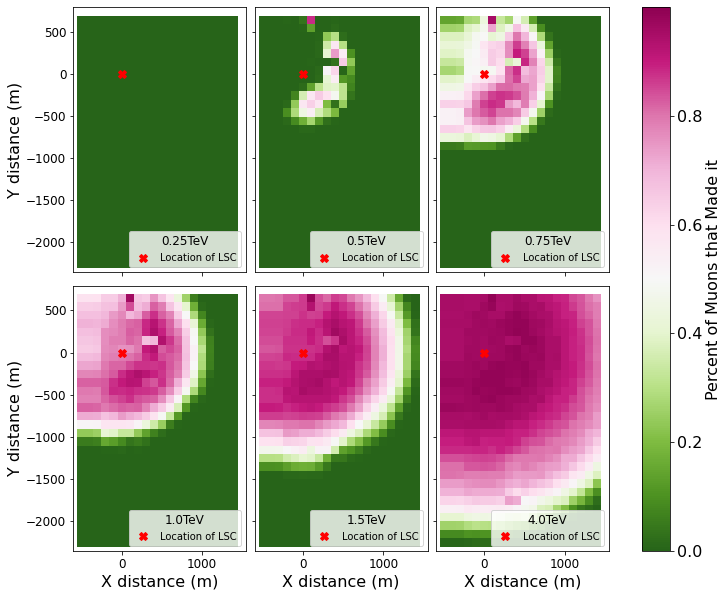

In [8]:
a=0

locs=[1,2,3,4,5,8]



spacing=100
NumToRun=1000
Xmin=-500-spacing
Xmax=1500+spacing/2
Ymin=-2255-spacing
Ymax=745+spacing/2

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,10), sharex=True, sharey=True)
cmap = plt.get_cmap('PiYG')
for ax in axes.flat:
    LOC=locs[a]
    


    NRG=energies[LOC]

    with open('/Users/rogerslc/PROPOSAL/PROPOSAL/Proposal_Muons_interpolator'+str(NRG)+'TeV.pkl', 'rb') as f:
        PercentMuons = pickle.load(f)

    intexs=[]
    inteys=[]
    intepercs=[]
    for X in range(-500,1500,spacing):
        for Y in range(-2255,745,spacing):
            intexs.append(X)
            inteys.append(Y)
            intepercs.append(PercentMuons(X,Y)[0][0])


    intepercs = np.array(intepercs)
    intepercs=intepercs.reshape(len(np.unique(intexs)), len(np.unique(inteys)))
            
    
    im=ax.pcolormesh(np.unique(intexs),np.unique(inteys),np.transpose(intepercs),cmap=cmap.reversed(),shading='auto',vmin=0, vmax=1)
    ax.set_ylim(Ymin,Ymax)
    ax.set_xlim(Xmin,Xmax)
    ax.tick_params(axis='both', which='major', labelsize=12)


    #ax.title("Energy ="+str(energies[LOC]*GeV/10**6)+"TeV")
    ax.plot([0],[0],'X',label='Location of LSC',color='red',markersize=8)
    ax.legend(loc='lower right',title=str(NRG/10**6)+'TeV',title_fontsize=12)
    

    if (LOC>3):
        ax.set_xlabel("X distance (m)",fontsize=16)
    if (LOC==1) or (LOC==4):        
        ax.set_ylabel("Y distance (m)",fontsize=16)
    a+=1
fig.subplots_adjust(wspace=.05, hspace=.05)

cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Percent of Muons that Made it')
cbar.set_ticks(np.arange(0, 1, 0.2))
cbar.set_label('Percent of Muons that Made it', fontsize=16)
cbar.ax.tick_params(labelsize=16)
#fig.clim(0,1)


#fig.savefig("/Users/rogerslc/PROPOSAL/PROPOSAL/SimulatedPercents.png",dpi=250,bbox_inches='tight')

#plt.show()




